<a href="https://colab.research.google.com/github/Quantium/notebooks/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

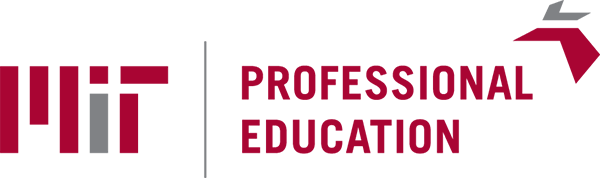

# Logistic Regression

This document is originaly to complement an assignment for the Course of Machine Learning at the [Chief Technology Officer Program](https://professional.mit.edu/course-catalog/blended-professional-certificate-chief-technology-officer) by Massachusets Insitute of Technology (MIT). MIT Professional Education

In [17]:
#@title Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Logistic Regression Basics

Logistic regression is used for binary classification. The goal is to predict the probability that an instance belongs to a particular class (usually denoted as 1) given a set of input features.

## Probability and Odds

1. **Probability \( p(x) \)**: This is the probability that the instance belongs to class 1 given the input features \( x \).
2. **Odds**: The odds of an event are defined as the ratio of the probability of the event occurring to the probability of it not occurring.

   $text{Odds} = \frac{p(x)}{1 - p(x)}$

## Log-Odds or Logit Function

Logistic regression models the log-odds (logit) of the probability as a linear combination of the input features. The log-odds is the natural logarithm of the odds.

$text{Log-Odds} = \log \left( \frac{p(x)}{1 - p(x)} \right)$

### Linear Combination of Features

In logistic regression, the log-odds is expressed as a linear combination of the input features:

$log \left( \frac{p(x)}{1 - p(x)} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$

where:

- $\beta_0$ is the intercept term.
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients corresponding to each input feature $x_1, x_2, \ldots, x_n$.

### Transforming Log-Odds to Probability

To convert the log-odds back to a probability, we use the inverse of the logit function, which is the logistic function:

$p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}$

## Step-by-Step Explanation

1. **Model Log-Odds**: The linear combination of the input features gives us the log-odds:

   $\log \left( \frac{p(x)}{1 - p(x)} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$

   This linear combination is easy to compute given the coefficients $\beta$ and the input features $x$.

2. **Exponentiate to Get Odds**: Taking the exponential of both sides, we transform the log-odds back to the odds:

   $\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n}$

3. **Solve for Probability**: Finally, we solve for the probability $p(x)$:

   $p(x) = \frac{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n}}{1 + e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n}}$

   This equation is known as the logistic function and ensures that the predicted probability $p(x)$ is always between 0 and 1.

### Summary

- Logistic regression transforms the probability $p(x)$ into the log-odds using the logit function.
- The log-odds are modeled as a linear combination of the input features.
- The logistic function (inverse of the logit function) converts the log-odds back to a probability.

This process allows logistic regression to predict probabilities while maintaining the linear relationship between the transformed outcome (log-odds) and the input features.

## Let's code it

The following is a synthetic (simulated randomly) dataset generated with 10 samples:

In [18]:
#@title Generating Dataset
np.random.seed(2)
num_samples = 1000
max_sample_size = 100
X = np.random.rand(num_samples, 2) * max_sample_size
print(f"Synthetic Dataset: {X}")

Synthetic Dataset: [[43.59949021  2.59262318]
 [54.96624779 43.53223926]
 [42.03678021 33.0334821 ]
 ...
 [89.55472445 33.98950541]
 [88.45081321 94.04450253]
 [75.95833153 23.61055857]]


## Synthetic Data Generation

Given the synthetic dataset, the coefficients ($\beta_n$), and the intercept ($\beta_0$) are assumed as follows:

In [19]:
#@title Assumed coefficients
intercept = -1  # Intercept
beta = [0.05, -0.02]  # Coefficients

### `intercept = -1`

This line sets a specific intercept value for the logistic function used to create the labels in the dataset.

  $\beta_0 = -1$

A predefined intercept its used to simulate how the log-odds of the outcome depend on the input features. In this case, you are manually setting the intercept to -1 to create probabilities for the logistic function:

  $\text{log-odds} = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

Then

   $
   \text{log-odds} = -1 + \beta_1 x_1 + \beta_2 x_2
   $

### `beta = [0.05, -0.02]`

1. **Purpose**: This array is part of the synthetic data generation process. It sets specific coefficient values for the logistic function used to create the labels in the dataset.
2. **Function**: When generating synthetic data, you use predefined coefficients to simulate how each input feature affects the log-odds of the outcome. In this case, you are manually setting the coefficients for the two features:

   $
   \text{log-odds} = \text{intercept} + 0.05 \cdot x_1 - 0.02 \cdot x_2
   $

   The synthetic labels (defaults or no defaults) are then generated based on these probabilities.

### Why the Variable is Called "Beta"

In statistical notation, the coefficients of a linear model are often denoted by the Greek letter β (beta). This convention is widely used in regression analysis, including linear regression and logistic regression. The coefficients represent the strength and direction of the relationship between each feature and the log-odds of the outcome.

## Logistic Function

In order to convert the log-odds back to a probability, we use the inverse of the logit function, which is the logistic function:

$p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n)}}$


In [20]:
#@title Logistic function
def logistic_function(x):
    z = intercept + np.dot(x, beta)
    return 1 / (1 + np.exp(-z))


## Synthetic Labels

The synthetic labels (true or false) are then generated based on these probabilities.

In [21]:
#@title Synthetic Labels
y = (np.random.rand(num_samples) < logistic_function(X)).astype(int)
y

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,

## Learned Coefficients

**Model Coefficients** are the weights assigned to each feature (input variable) in the logistic regression model. These coefficients quantify the relationship between each feature and the log-odds of the outcome. They are denoted as $\beta_1, \beta_2, \ldots, \beta_n$ for the respective features $x_1, x_2, \ldots, x_n$.

### Interpretation:
- A positive coefficient indicates that an increase in the feature value increases the log-odds of the positive class (event happening).
- A negative coefficient indicates that an increase in the feature value decreases the log-odds of the positive class.


In [22]:
#@title Training the model and making predictions

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [23]:
#@title Printing Learned coefficients
print(f"Model coefficients: {model.coef_}")

Model coefficients: [[ 0.05375294 -0.0203346 ]]


### Explanation:

- **Model Coefficients**:
   - The output `model.coef_` will provide the coefficients for each feature.
   - Example: If `model.coef_ = [[0.05, -0.02]]`, it means that:
     - For every unit increase in the first feature (salary), the log-odds of defaulting increases by 0.05.
     - For every unit increase in the second feature (credit rating), the log-odds of defaulting decreases by 0.02.

### Summary

- **Model Coefficients** quantify the relationship between each feature and the log-odds of the outcome.

## Learned Intercept

**Model Intercept** (denoted as $\beta_0$) is the baseline value of the log-odds when all feature values are zero. It shifts the logistic regression curve up or down and helps determine the threshold for classification.

### Formula:
The logistic regression equation incorporating the intercept and coefficients is:

$
\text{Log-Odds} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$

In [24]:
#@title Printing Learned intercept
print(f"Model intercept: {model.intercept_}")

Model intercept: [-1.24235252]



### Explanation:

- **Model Intercept**:
   - The output `model.intercept_` provides the intercept of the model.
   - Example: If `model.intercept_ = [-1]`, it means that when all feature values are zero, the log-odds of defaulting is -1.

### Summary

- **Model Intercept** is the baseline log-odds when all feature values are zero.

--------

In [25]:
#@title Printing Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[ 86  31]
 [ 35 148]]


## Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It compares the predicted classifications to the actual classifications to understand how well the model is performing. Here's a breakdown of the components of a confusion matrix:

### Structure of a Confusion Matrix

For a binary classification problem, a confusion matrix is typically a 2x2 table:


$
\begin{array}{cc|c}
 & & \text{Actual Positive} & \text{Actual Negative} \\
\hline
& \text{Predicted Positive} & \text{TP} & \text{FP} \\
& \text{Predicted Negative} & \text{FN} & \text{TN} \\
\end{array}
$

### Definitions

1. **True Positive (TP)**: The number of instances that are correctly predicted as positive (correctly identified positive cases).

2. **False Positive (FP)**: The number of instances that are incorrectly predicted as positive (negative cases incorrectly identified as positive, also known as Type I error).

3. **False Negative (FN)**: The number of instances that are incorrectly predicted as negative (positive cases incorrectly identified as negative, also known as Type II error).

4. **True Negative (TN)**: The number of instances that are correctly predicted as negative (correctly identified negative cases).

The confusion matrix provides a comprehensive view of how the classification model is performing, allowing us to understand not just overall accuracy but also how well it handles positives and negatives.

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"TPR: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Confusion matrix to calculate specificity and FPR
tn, fp, fn, tp = conf_matrix.ravel()

specificity = tn / (tn + fp)
print(f"TNR: {specificity}")

fpr = fp / (fp + tn)
print(f"FPR: {fpr}")

Accuracy: 0.78
Precision: 0.8268156424581006
TPR: 0.8087431693989071
F1 Score: 0.8176795580110497
TNR: 0.7350427350427351
FPR: 0.26495726495726496


### Metrics Derived from the Confusion Matrix

Using the values from the confusion matrix, several important performance metrics can be calculated:

1. **Accuracy**: The overall correctness of the model.
   
   $\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}$

2. **Precision (Positive Predictive Value)**: The proportion of positive predictions that are actually correct.

   $\text{Precision} = \frac{TP}{TP + FP}$

3. **True Positive Rate(TPR), Sensitivity or Recall**: The proportion of actual positives that are correctly identified.

   $\text{TPR} = \frac{TP}{TP + FN}$

4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two.

   $\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

5. **True Negative Rate (TNR) or Specificity**: The proportion of actual negatives that are correctly identified.

   $\text{TNR} = \frac{TN}{TN + FP}$

6. **False Positive Rate (FPR)**: The proportion of actual negatives that are incorrectly identified as positives.

   $\text{FPR} = \frac{FP}{FP + TN}$

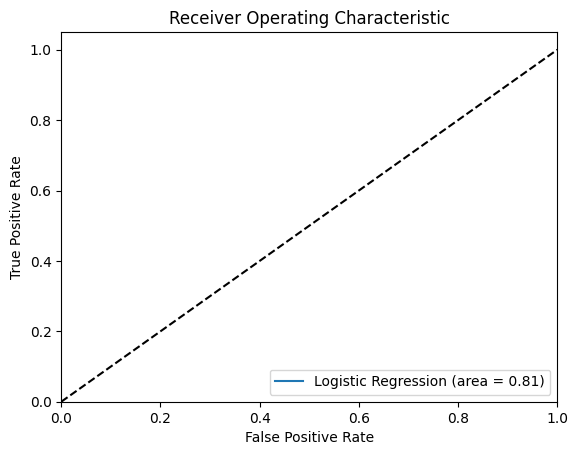

In [27]:
#@title Plotting the ROC curve
# fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) #Area Under the Curve
plt.figure()
plt.plot(fpr, recall, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

### ROC Curve Plot

- **X-Axis**: False Positive Rate (FPR)
- **Y-Axis**: True Positive Rate (TPR)

### Understanding the ROC Curve

- **Diagonal Line (Random Classifier)**: A line from the bottom-left to the top-right (45-degree line) represents a random classifier that makes predictions with no discriminative power. It serves as a baseline.
- **Above the Diagonal**: A model that performs better than random will have a curve that lies above the diagonal line.
- **Perfect Model**: A perfect model will have an ROC curve that goes from the bottom-left to the top-left and then to the top-right corner, indicating a TPR of 1 and an FPR of 0.

### Area Under the Curve (AUC)

- **AUC (Area Under the Curve)**: The AUC value ranges from 0 to 1 and provides a single scalar value to assess the model's performance. An AUC of 1 indicates a perfect model, while an AUC of 0.5 indicates a model with no discriminative power (random guessing).

### Explanation of the Code

1. **ROC Curve Calculation**:
   - The commented `roc_curve` can be used to calculate the False Positive Rate (FPR) and True Positive Rate (TPR) in the same way the Confussion Matrix does.
   - `roc_auc_score` calculates the AUC.

2. **Plotting the ROC Curve**:
   - The ROC curve is plotted with FPR on the x-axis and TPR on the y-axis.
   - A diagonal line representing a random classifier is plotted for comparison.
   - The AUC value is displayed in the legend.

By analyzing the ROC curve and the AUC, you can assess the discriminative power of the classification model across different threshold settings.

In [28]:
# Displaying log-odds transformation
log_odds = model.intercept_ + np.dot(X_test, model.coef_.T)
probabilities = 1 / (1 + np.exp(-log_odds))
print(f"Log-Odds:\n{log_odds[:5]}")
print(f"Predicted Probabilities:\n{probabilities[:5]}")
print(f"Actual Probabilities:\n{y_prob[:5]}")

Log-Odds:
[[ 2.79882052]
 [-0.96615459]
 [ 1.64386853]
 [-0.98625141]
 [ 0.65034337]]
Predicted Probabilities:
[[0.94261205]
 [0.27564764]
 [0.83806064]
 [0.27165313]
 [0.65708784]]
Actual Probabilities:
[0.94261205 0.27564764 0.83806064 0.27165313 0.65708784]


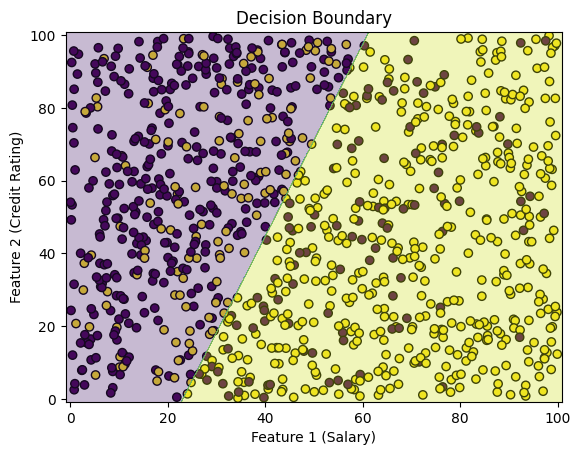

In [29]:
# Plotting the data points
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# Plotting the decision boundary
# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Compute the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.xlabel('Feature 1 (Salary)')
plt.ylabel('Feature 2 (Credit Rating)')
plt.title('Decision Boundary')
plt.show()